# Differential Forms <img height="60" src="logo/logo_DF-PNG.png" width="60"/>

### Import

In [1]:
import matplotlib
import numpy as np
import seaborn as sns

from differentialforms.Canvas import DrawingCanvas
from differentialforms.Phasor import Phasor, Pintograph
from utils import timeline

matplotlib.use('TkAgg')
%matplotlib inline

np.set_printoptions(suppress=True)
sns.set_theme()

## Drawings

In [2]:
tmax = 300
dt = 0.01

pi = np.pi
tim = timeline(t_max=tmax, dt=dt)
u = tim / tmax

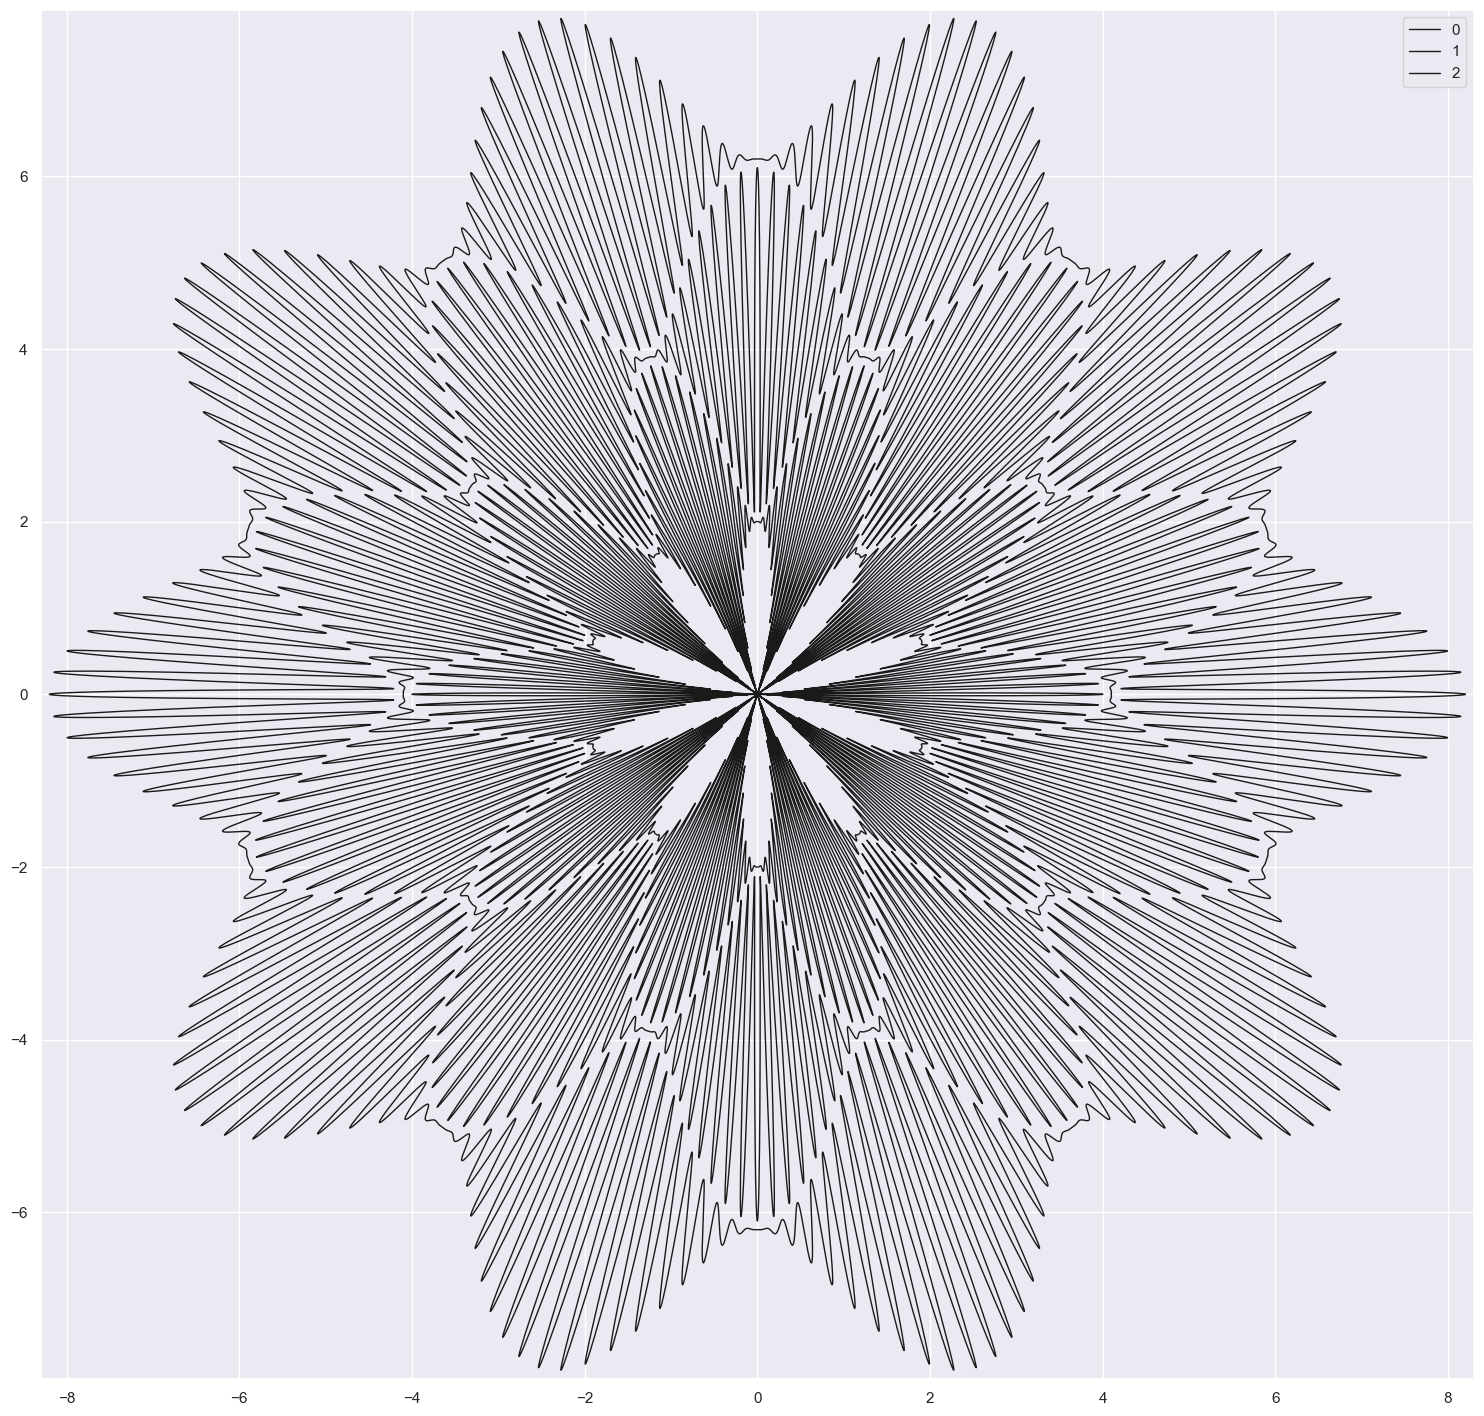

In [4]:
r1 = 4.1
r2 = np.sin(10*pi*u)**2
period = tmax

curve = Phasor(time=tim, x_cent=0, y_cent=0, radius=r1, period=period, phase=0)
curve2 = Phasor(time=tim, x_cent=curve.x, y_cent=curve.y, radius=r2, period=1, phase=2*pi*u)
curve3 = Phasor(time=tim, x_cent=curve2.x, y_cent=curve2.y, radius=r2, period=-1, phase=2*pi*u)

r3 = 1 - r2
curve4 = Phasor(time=tim, x_cent=0, y_cent=0, radius=6.2, period=period, phase=0)
curve5 = Phasor(time=tim, x_cent=curve4.x, y_cent=curve4.y, radius=r3, period=1, phase=2*pi*u)
curve6 = Phasor(time=tim, x_cent=curve5.x, y_cent=curve5.y, radius=r3, period=-1, phase=2*pi*u)

r4 = 1 - r2
curve7 = Phasor(time=tim, x_cent=0, y_cent=0, radius=2, period=period, phase=0)
curve8 = Phasor(time=tim, x_cent=curve7.x, y_cent=curve7.y, radius=r4, period=1, phase=2*pi*u)
curve9 = Phasor(time=tim, x_cent=curve8.x, y_cent=curve8.y, radius=r4, period=-1, phase=2*pi*u)

canv = DrawingCanvas().add([curve3, curve6, curve9])
canv.plot(linecolor=["k", "k", "k"], save=False, legend=True, logo=True)

In [57]:
t1 = tmax * 0.2
t2 = tmax * 0.45
t3 = tmax * 0.8

tmax = 500
dt = 0.01

pi = np.pi
tim = timeline(t_max=tmax, dt=dt)
u = tim / tmax

### Change the radius with a piecewise function (periodic)

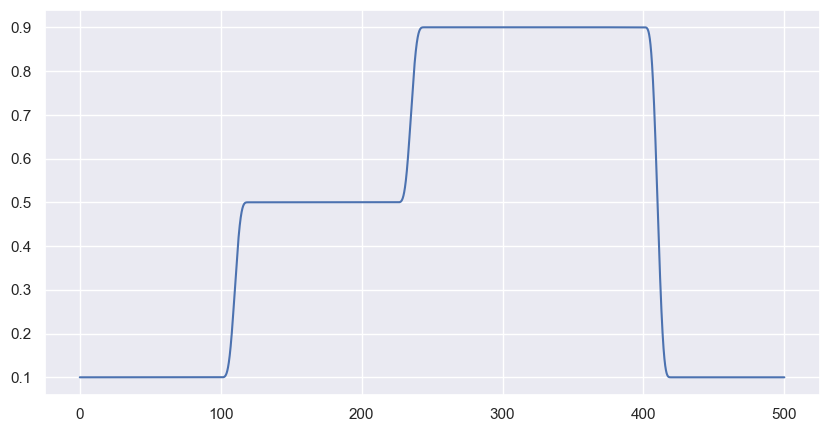

In [58]:
A = 0.1
B = 0.5
C = 0.9

T_ramp = 20

from scipy.special import comb

def smoothstep(x, x_min=0, x_max=1, N=1):
    x = np.clip((x - x_min) / (x_max - x_min), 0, 1)

    result = 0
    for n in range(0, N + 1):
         result += comb(N + n, n) * comb(2 * N + 1, N - n) * (-x) ** n

    result *= x ** (N + 1)
    return result

radius = np.zeros_like(tim)
N = 4
for i in range(len(tim)):
    if tim[i] <= t1:
        radius[i] = A

    if t1 < tim[i] <= t1 + T_ramp:
        radius[i] = (B-A)*smoothstep(tim[i], x_min=t1, x_max=t1+T_ramp, N=N) + A       # y = m(x-x0) + y0

    if t1 + T_ramp < tim[i] <= t2:
        radius[i] = B

    if t2 < tim[i] <= t2 + T_ramp:
        radius[i] = (C-B)*smoothstep(tim[i], x_min=t2, x_max=t2+T_ramp, N=N) + B

    if t2 + T_ramp < tim[i] <= t3:
        radius[i] = C

    if t3 < tim[i] <= t3 + T_ramp:
        radius[i] = (A-C)*smoothstep(tim[i], x_min=t3, x_max=t3+T_ramp, N=N) + C

    if tim[i] > t3 + T_ramp:
        radius[i] = A

import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(tim, radius)


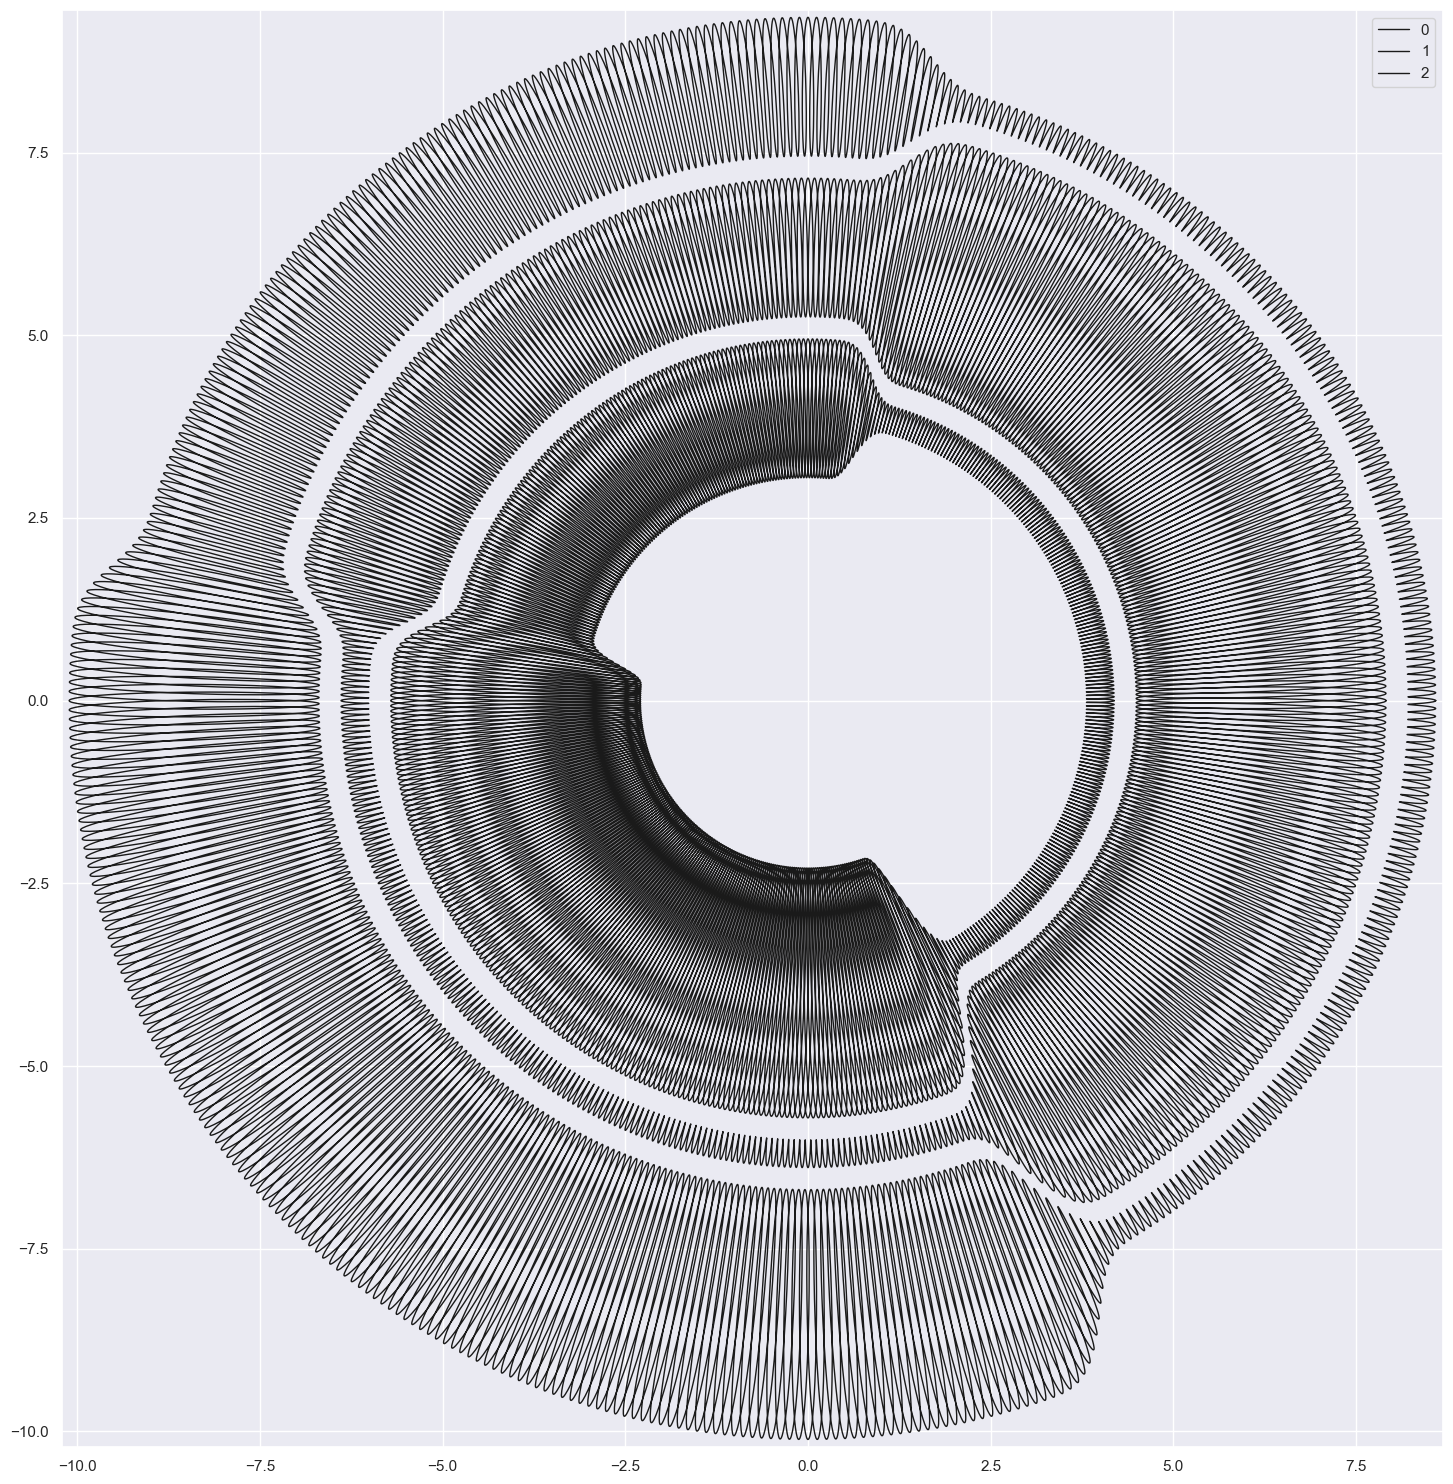

Lesgooo!


In [59]:
period = tmax
E = 0.9   # parameter defining "inverse eccentricity" E=0 -> circles, E=1 -> "sine wave"

curve = Phasor(time=tim, x_cent=0, y_cent=0, radius=4, period=period, phase=0)
curve2 = Phasor(time=tim, x_cent=curve.x, y_cent=curve.y, radius=radius, period=1, phase=2 * pi * u)
curve3 = Phasor(time=tim, x_cent=curve2.x, y_cent=curve2.y, radius= E * radius, period=-1, phase=2 * pi * u)

r3 = 1 - radius
curve4 = Phasor(time=tim, x_cent=0, y_cent=0, radius=6.2, period=period, phase=0)
curve5 = Phasor(time=tim, x_cent=curve4.x, y_cent=curve4.y, radius=r3, period=1, phase=2 * pi * u)
curve6 = Phasor(time=tim, x_cent=curve5.x, y_cent=curve5.y, radius= E * r3, period=-1, phase=2 * pi * u)

r4 = 1 - r3
curve7 = Phasor(time=tim, x_cent=0, y_cent=0, radius=8.4, period=period, phase=0)
curve8 = Phasor(time=tim, x_cent=curve7.x, y_cent=curve7.y, radius=r4, period=1, phase=2 * pi * u)
curve9 = Phasor(time=tim, x_cent=curve8.x, y_cent=curve8.y, radius= E * r4, period=-1, phase=2 * pi * u)

canv = DrawingCanvas().add([curve3, curve6, curve9])
canv.plot(linecolor=["k", "k", "k"], save=False, legend=True, logo=True)
print("Lesgooo!")